# Is there a correlation between usage of service and churning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
p_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/data.csv')

df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2682,DC,55,510,354-5058,yes,no,0,106.1,77,...,100,10.50,96.4,92,4.34,12.9,3,3.48,0,False
1,3304,IL,71,510,330-7137,yes,no,0,186.1,114,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
2,757,UT,112,415,358-5953,no,no,0,115.8,108,...,111,20.68,184.6,78,8.31,13.1,5,3.54,1,False
3,2402,NY,77,415,388-9285,no,yes,33,143.0,101,...,102,18.04,104.9,120,4.72,15.3,4,4.13,5,True
4,792,NV,69,510,397-6789,yes,yes,33,271.5,98,...,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True


In [3]:
t_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

t_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [4]:
tr_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

tr_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [8]:
df = p_df.drop(columns=['Unnamed: 0'])

In [5]:
test_df = t_df.drop(columns=['Unnamed: 0'])
test_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,IN,68,415,386-9724,no,no,0,222.1,107,37.76,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,MI,102,510,336-4656,no,no,0,102.6,89,17.44,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,AZ,72,510,407-9830,no,no,0,272.4,88,46.31,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,OK,52,408,389-4780,no,no,0,214.7,68,36.50,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,FL,84,510,341-3180,no,no,0,191.0,88,32.47,...,119,27.10,247.3,79,11.13,6.5,4,1.76,0,False
330,WI,93,415,392-6286,no,no,0,152.1,141,25.86,...,107,18.32,262.4,111,11.81,12.0,7,3.24,1,False
331,MI,61,415,349-5617,no,yes,33,270.7,53,46.02,...,116,17.06,201.7,102,9.08,10.9,3,2.94,3,False
332,CA,37,415,345-1243,no,no,0,191.1,69,32.49,...,113,10.98,207.5,117,9.34,12.9,1,3.48,0,False


In [10]:
train_df = tr_df.drop(columns=['Unnamed: 0'])
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,IN,68,415,386-9724,no,no,0,222.1,107,37.76,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,MI,102,510,336-4656,no,no,0,102.6,89,17.44,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,AZ,72,510,407-9830,no,no,0,272.4,88,46.31,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,OK,52,408,389-4780,no,no,0,214.7,68,36.50,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,FL,84,510,341-3180,no,no,0,191.0,88,32.47,...,119,27.10,247.3,79,11.13,6.5,4,1.76,0,False
330,WI,93,415,392-6286,no,no,0,152.1,141,25.86,...,107,18.32,262.4,111,11.81,12.0,7,3.24,1,False
331,MI,61,415,349-5617,no,yes,33,270.7,53,46.02,...,116,17.06,201.7,102,9.08,10.9,3,2.94,3,False
332,CA,37,415,345-1243,no,no,0,191.1,69,32.49,...,113,10.98,207.5,117,9.34,12.9,1,3.48,0,False


In [41]:
# Not including 
calls_df = train_df[['total day calls', 'total eve calls', 'total night calls', 'churn']]
calls_df.head()

,total day calls,total eve calls,total night calls,churn
0,107,102,107,False
1,89,77,140,False
2,88,125,81,False
3,85,93,114,False
4,68,138,114,False


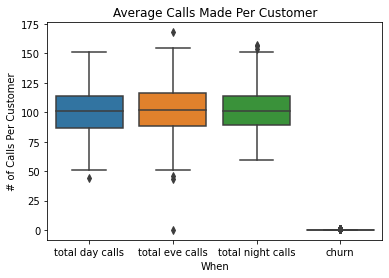

In [42]:
sns.boxplot(data=calls_df)

plt.title('Average Calls Made Per Customer')
plt.xlabel('When')
plt.ylabel('# of Calls Per Customer')
plt.show()

In [60]:
day_rate = (train_df['total day charge'] / train_df['total day minutes']).mean()
eve_rate = (train_df['total eve charge'] / train_df['total eve minutes']).mean()
night_rate = (train_df['total night charge'] / train_df['total night minutes']).mean()
intl_rate = (train_df['total intl charge'] / train_df['total intl minutes']).mean()


print('Day:', day_rate)
print('Evening', eve_rate)
print('Night', night_rate)
print('International', intl_rate)

Day: 0.1700023347873302
Evening 0.08499994679841502
Night 0.045000441023433216
International 0.2700361900698886


In [61]:
day_rate = train_df['total day minutes'].mean()
eve_rate = train_df['total eve minutes'].mean()
night_rate =  train_df['total night minutes'].mean()
intl_rate = train_df['total intl minutes'].mean()


print('Day:', day_rate)
print('Evening', eve_rate)
print('Night', night_rate)
print('International', intl_rate)

Day: 181.89520958083833
Evening 198.23832335329342
Night 202.68083832335333
International 10.211976047904193


In [44]:
df_intl = train_df.loc[train_df['international plan'] == 'yes']
df_non_intl = train_df.loc[train_df['international plan'] == 'no']

In [45]:
df_intl.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
5,NE,112,415,351-2928,yes,yes,16,200.3,72,34.05,...,91,16.81,151.1,92,6.80,10.4,3,2.81,1,False
16,AL,19,415,380-3910,yes,no,0,237.7,98,40.41,...,121,17.60,182.2,95,8.20,4.5,4,1.22,0,False
45,MN,100,415,399-2151,yes,no,0,159.9,94,27.18,...,95,15.29,154.4,102,6.95,11.6,2,3.13,2,True
54,OR,149,415,332-9460,yes,no,0,176.2,87,29.95,...,81,12.33,249.5,92,11.23,5.7,4,1.54,0,False
65,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False


In [46]:
intl_churn = pd.DataFrame(df_intl['churn'].value_counts(normalize=True), columns=['churn'])
non_intl_churn = pd.DataFrame(df_non_intl['churn'].value_counts(normalize=True), columns=['churn'])

display(intl_churn)
display(non_intl_churn)

,churn
False,0.612903
True,0.387097


,churn
False,0.864686
True,0.135314


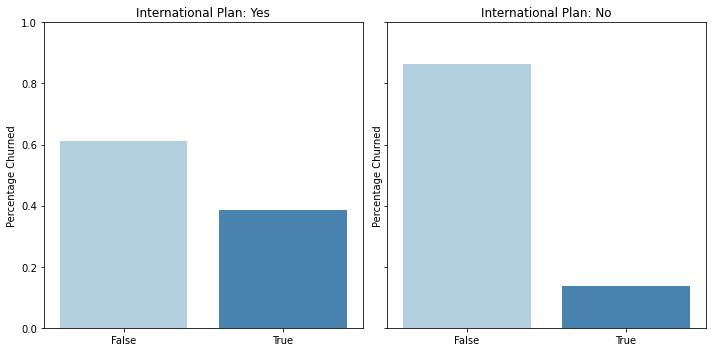

In [47]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.barplot(x=['False', 'True'], y='churn', data=intl_churn, ax=axes[0], palette='Blues')
sns.barplot(x=['False', 'True'], y='churn', data=non_intl_churn, ax=axes[1], palette='Blues')
axes[0].set_title('International Plan: Yes')
axes[1].set_title('International Plan: No')
axes[0].set_ylabel('Percentage Churned')
axes[1].set_ylabel('Percentage Churned')
plt.ylim(0,1)
plt.tight_layout()
plt.show()